# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
COLS = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation',\
        'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
my_df = pd.read_csv(url, skipinitialspace = True, header = None)
my_df.columns = COLS

In [13]:
print(my_df[25:35])

    age    workclass  fnlwgt          educ  educ_num      marital_status  \
25   56    Local-gov  216851     Bachelors        13  Married-civ-spouse   
26   19      Private  168294       HS-grad         9       Never-married   
27   54            ?  180211  Some-college        10  Married-civ-spouse   
28   39      Private  367260       HS-grad         9            Divorced   
29   49      Private  193366       HS-grad         9  Married-civ-spouse   
30   23    Local-gov  190709    Assoc-acdm        12       Never-married   
31   20      Private  266015  Some-college        10       Never-married   
32   45      Private  386940     Bachelors        13            Divorced   
33   30  Federal-gov   59951  Some-college        10  Married-civ-spouse   
34   22    State-gov  311512  Some-college        10  Married-civ-spouse   

         occupation   relationship                race   sex  capital_gain  \
25     Tech-support        Husband               White  Male             0   
26     

##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

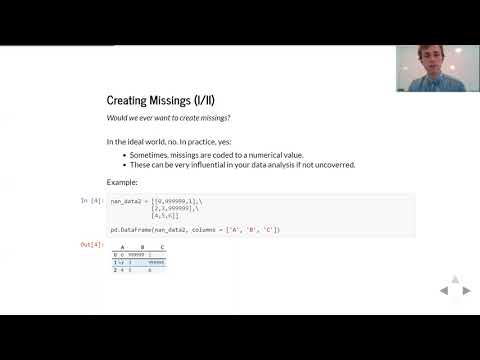

In [14]:
YouTubeVideo('SGvtwBsAuqw', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [24]:
from numpy import NaN
# The missing value sign is '?'
df_census_new = pd.DataFrame(my_df)\
                    .replace('?', np.NaN)\
                    .dropna(axis = 0)

In [25]:
# We can see how many rows are dropped my the pd.info() method or simply by the length of a column:
print(len(df_census_new['age']))
print(len(my_df['age']))

30162
32561


##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

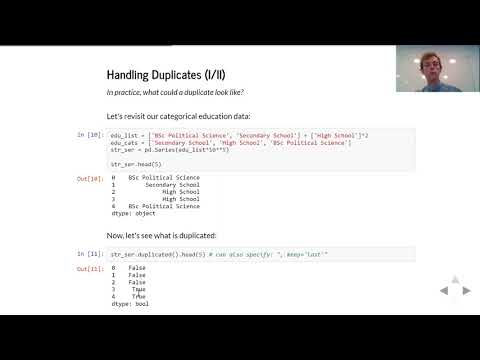

In [23]:
YouTubeVideo('FljpLkFU3KA', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [26]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [27]:
weather_df = load_weather(1863)
weather_df.head(5)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0


In [30]:
# The .duplicated returns a column with true/false. 
# We can check whether or not we have duplicates in our dataframe by summing this dataframe.
print(weather_df.duplicated().sum(axis = 0))

0


In [35]:
# We can also choose to search only by certain categories
print(weather_df.duplicated(['datetime', 'obs_value']).sum(axis = 0))

290


# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets. If you want to know more then you can look up Chapter 8, section 8.2 in Python for Data Analysis, 2ed.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows. You can read more about these types of merges by visiting the Jake van der Plass [link](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html) or looking into PDA, section 8.2.

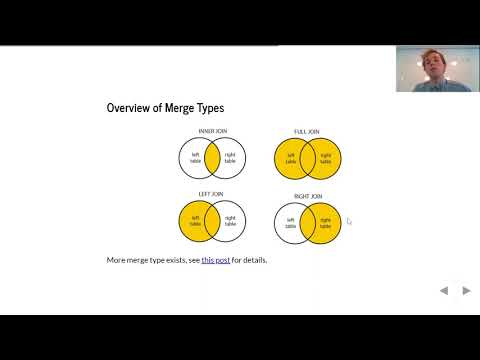

In [36]:
YouTubeVideo('bGpYXW2D0Mk', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [43]:
# Here we load all the dataframes into a list
years = [1870, 1871, 1872, 1873, 1874, 1875]
w_dfs = []
for y in years:
    df = load_weather(y)
    # We add the year as a column
    df['year'] = int(y)
    w_dfs.append(df)


In [47]:
# We join the dfs for the different years into a single df on top of each other.
big_w_df = pd.concat(w_dfs, join = 'outer', axis = 0, sort = True)
display(big_w_df)

,datetime,obs_type,obs_value,station,year
0,18700809,TMAX,10.0,ASN00063004,1870
1,18700810,TMAX,8.9,ASN00063004,1870
2,18700811,TMAX,15.6,ASN00063004,1870
3,18700812,TMAX,16.7,ASN00063004,1870
4,18700813,TMAX,16.7,ASN00063004,1870
...,...,...,...,...,...
33125,18751227,TMAX,10.6,USW00094728,1875
33126,18751228,TMAX,1.1,USW00094728,1875
33127,18751229,TMAX,2.8,USW00094728,1875
33128,18751230,TMAX,6.7,USW00094728,1875


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas. If you want to know more then you can look up Chapter 10 in Python for Data Analysis, 2ed.

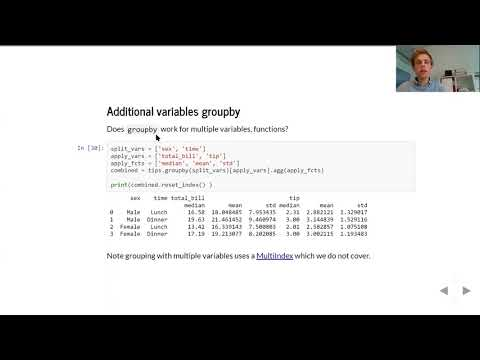

In [48]:
YouTubeVideo('ZDgbVD5Y2us', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [54]:
# First we add the month to each observation
big_w_df['datetime'] = big_w_df['datetime'].astype(str)
big_w_df['month'] = pd.to_datetime(big_w_df['datetime']).dt.month

In [57]:
# First we define the columns we want to split by
split_vars = ['month', 'year', 'station']

#Then we define which variables we want to use for computation
apply_vars = ['obs_value']

#We apply the different functions on the different groups and store them in new columns
big_w_df['tmax_mean'] = big_w_df.groupby(split_vars)[apply_vars].transform('mean')
big_w_df['tmax_median'] = big_w_df.groupby(split_vars)[apply_vars].transform('median')

> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

In [81]:
# Dataframe containing 'CA006110549'
# We use groupby. for a column and then afterwards we use .get_group to get a specific obs group
df_1 = big_w_df.groupby('station').get_group('CA006110549')
df_1.describe()

,obs_value,year,month,tmax_mean,tmax_median
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,10.395920,1871.993924,6.049479,10.395920,10.741927
std,12.354568,1.109534,3.670885,11.276214,11.083206
min,-18.300000,1870.000000,1.000000,-4.419231,-3.350000
25%,0.600000,1871.000000,3.000000,-0.668000,1.100000
50%,7.800000,1872.000000,6.000000,5.529630,5.600000
75%,22.200000,1873.000000,9.000000,21.900000,22.200000
max,35.600000,1874.000000,12.000000,27.811111,28.300000


> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [85]:
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
satelite = pd.read_fwf(url, colspecs = [(0,11), (12,20), (21,30), (31,37),\
                                        (38,40), (41,71), (72,75), (76,79), (80,85)], header = None)


,0,1,2,3,4,5,6,7,8
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0
...,...,...,...,...,...,...,...,...,...
118487,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,NaN,67969.0
118488,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,NaN,67975.0
118489,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,NaN,67977.0
118490,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,NaN,67983.0


In [94]:
COLS = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'GSN flag', 'HCN/CRN flag', 'WMO ID']
satelite.columns = COLS
final_weather = pd.merge(big_w_df, satelite, on='station', how='left')
final_weather.describe()

,obs_value,year,month,tmax_mean,tmax_median,latitude,longitude,elevation,WMO ID
count,138159.000000,138159.000000,138159.000000,138159.000000,138159.000000,138159.000000,138159.000000,138159.000000,27492.000000
mean,13.951777,1873.045064,6.645857,13.951777,14.005379,35.751665,-31.059011,244.261998,46737.722319
std,11.713762,1.613081,3.448427,10.539668,10.509969,25.355975,75.643915,489.987426,36434.467991
min,-573.300000,1870.000000,1.000000,-21.700000,-23.900000,-38.855600,-123.416700,-999.900000,3026.000000
25%,5.300000,1872.000000,4.000000,4.948387,5.000000,40.778900,-81.000000,39.000000,6717.000000
50%,15.000000,1873.000000,7.000000,15.319355,15.400000,44.150000,-71.535000,104.000000,43497.000000
75%,22.800000,1874.000000,10.000000,22.443333,22.200000,47.050000,11.345800,220.100000,72506.000000
max,47.800000,1875.000000,12.000000,41.100000,41.100000,58.330000,151.205000,2472.000000,94868.000000


##  Bonus Exercises

If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose. If you want to know more, then you can look up Chapter 8, section 8.3 in Python for Data Analysis, 2ed.

In [1]:
YouTubeVideo('pOYQVpFCEu0', width=640, height=360)

NameError: name 'YouTubeVideo' is not defined

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()